In [5]:
using PyPlot;

# 1D

#### Construct 1D types

In [2]:
struct Grid1D
    # This is a struct that contains
    # the number of points N, and the 
    # length of the grid; our grid spans
    # from -L to L.
    N::Int
    L::Float64
end

In [3]:
function deltax(grid::Grid1D)
    # Computes the grid spacing. The factor of
    # two comes from the fact that our grid spans
    # from -L to L.
    return (2*grid.L)/(grid.N-1)
end

deltax (generic function with 1 method)

#### Construct 1D functions

In [24]:
function map_function_on_grid(u::Function, grid::Grid1D)::Array{Float64,1}
    # Takes a 1D function and computes it on the grid
    ux = zeros(grid.N)
    h  = deltax(grid)
    for i in 1:grid.N
        x     = -grid.L + (i-1)*h # compute the coordinates x; for i == 1, we get -L. For i == N, we get +L.
        ux[i] = u(x) 
    end
    return ux
end

map_function_on_grid (generic function with 1 method)

#### Construct 1D derivatives

In [26]:
function D(u::Array{Float64,1}, grid::Grid1D)::Array{Float64}
    # Computes the derivative of a function on a 1D grid
    dudx = zeros(grid.N)
    h    = deltax(grid)
    for i in 1:grid.N
        if i == 1
            dudx[i] = (u[i+1] -   u[i])/h      
        elseif i == grid.N
            dudx[i] = (u[i]   - u[i-1])/h           
        else
            dudx[i] = (u[i+1] - u[i-1])/2h
        end
    end
    return dudx
end

D (generic function with 1 method)

#### Test 1D derivatives
Do a convergence test.

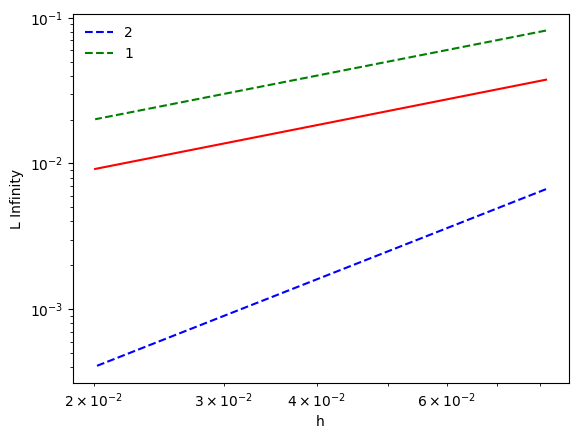

In [45]:
H = []
E = []

for N in 50:200
    grid  = Grid1D(N, 2) # Define a grid type with N points spanning from [-2, 2]
    u     = map_function_on_grid(x->sin(x), grid) # map sin(x) on the grid
    dudx  = map_function_on_grid(x->cos(x), grid) # map it's derivative cos(x) on the grid. We test our
                                                  # numerical derivative against this.
    error = maximum(abs.(D(u, grid) - dudx)) # Compute the difference between the numerical derivative and the 
                                             # analytical one, and then take the maximum of it's absolute value. 
                                             # This is called the L infinity norm.
    h     = deltax(grid)
    append!(H, h) # Append h to the array H
    append!(E, error) # Append errorr to the array E
end
   
# Plot in loglog scale. Remember that the finite difference algorithm you're
# using is second order everywhere except on the boundaries where it's first 
# order. Since the error in a p-th order scheme falls off as h^p, in a loglog
# plot the slope of line (error vs. h) is just a line with slope p.
# In reality however, the error in a loglog plot has the form C*h^p + B where
# C and B are constants. Therefore, to understand our convergence order, 
# we only compare the slopes of the lines. Notice how our numerical error (red) has the
# same slope as the green dashed line, which tells us we have first order convergence.
# Does that agree with your expectations?
loglog(H, E, "r-")
loglog(H, H.^2, "b--", label="2")
loglog(H, H, "g--", label="1")
xlabel("h")
ylabel("L Infinity")
legend(loc="best", frameon=false)
show()

# 2D

Things to do

- Construct a 2D Grid type, which now holds Nx, Ny, Lx and Ly.
- Construct a function or functions that compute hx and hy for each of the directions.
- *Upgrade* the 2D map function and then the 2D derivative functions to work with this Grid2D type
- Look at convergence separately in each direction, first in x, then in y by comparing your numerical derivative with analytic solution. Make sure you get the order of convergence you would expect.

#### Construct 2D functions

In [39]:
function map_function_on_grid(u::Function, Nx::Int, Ny::Int)::Array{Float64,2}
    uxy = zeros(Nx, Ny)
    hx  = 2/(Nx-1)
    hy  = 2/(Ny-1)
    for i in 1:Nx, j in 1:Ny
        x = -1 + (i-1)*hx
        y = -1 + (j-1)*hy
        uxy[i,j] = u(x,y) 
    end
    return uxy
end

map_function_on_grid (generic function with 2 methods)

#### Construct 2D derivatives

In [40]:
function Dx(u::Array{Float64,2}, Nx::Int, Ny::Int)::Array{Float64}
    dudx = zeros(Nx, Ny)
    hx   = 2/(Nx-1)
    for i in 1:Nx, j in 1:Ny
        if i == 1
            dudx[i] = (u[i+1,j] -   u[i,j])/hx    
        elseif i == Nx
            dudx[i] = (u[i,j]   - u[i-1,j])/hx           
        else
            dudx[i] = (u[i+1,j] - u[i-1,j])/2hx
        end
    end
    return dudx
end

Dx (generic function with 1 method)

In [41]:
function Dy(u::Array{Float64,2}, Nx::Int, Ny::Int)::Array{Float64}
    dudy = zeros(Nx, Ny)
    hy   = 2/(Ny-1)
    for i in 1:Nx, j in 1:Ny
        if j == 1
            dudy[i] = (u[i,j+1] -   u[i,j])/hy    
        elseif j == Ny
            dudy[i] = (u[i,j]   - u[i,j-1])/hy           
        else
            dudy[i] = (u[i,j+1] - u[i,j-1])/2hy
        end
    end
    return dudy
end

Dy (generic function with 1 method)

#### Test 2D derivatives

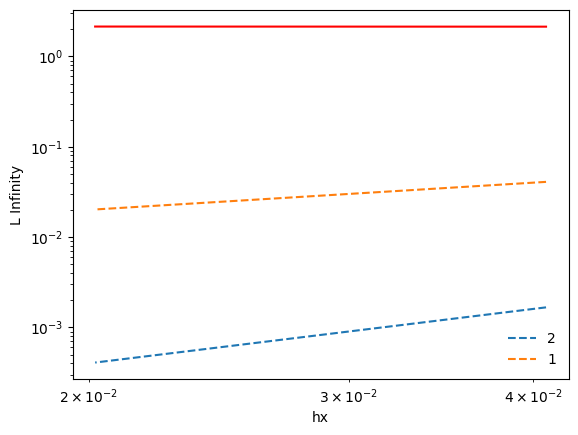

In [49]:
Hx = []
Ex = []
Hy = []
Ey = []

for Nx in 50:100, Ny in 50:100
    u      = map_function_on_grid((x,y)-> sin(pi*x)*cos(pi*y), Nx, Ny) # compute a function on a grid
    dudx   = map_function_on_grid((x,y)-> cos(pi*x)*cos(pi*y), Nx, Ny) # compute analytic derivative along x
    dudy   = map_function_on_grid((x,y)->-sin(pi*x)*sin(pi*y), Nx, Ny) # compute analytic derivative along y
    errorx = maximum(abs.(Dx(u, Nx, Ny) - dudx))
    errory = maximum(abs.(Dy(u, Nx, Ny) - dudy))
    hx     = 2/(Nx-1)
    hy     = 2/(Ny-1)
    append!(Hx, hx)
    append!(Ex, errorx)
    append!(Hy, hy)
    append!(Ey, errory)
end
   
loglog(Hx, Ex, "r-")
loglog(Hx, Hx.^2, "--",label="2")
loglog(Hx, Hx, "--", label="1")
xlabel("hx")
ylabel("L Infinity")
legend(loc="best", frameon=false)
show()

# Plotting functions

## 1D

In [57]:
x = map_function_on_grid(x->x, Grid1D(100, 2)) # Gives 100 equispaced points between -2 and 2. 
                                               # Notice how the identity map (x->x) is useful 
                                               # for giving the coordinates.

100-element Array{Float64,1}:
 -2.0
 -1.9595959595959596
 -1.9191919191919191
 -1.878787878787879
 -1.8383838383838385
 -1.797979797979798
 -1.7575757575757576
 -1.7171717171717171
 -1.6767676767676767
 -1.6363636363636362
 -1.595959595959596
 -1.5555555555555556
 -1.5151515151515151
  ⋮
  1.5555555555555558
  1.5959595959595965
  1.6363636363636367
  1.676767676767677
  1.7171717171717176
  1.7575757575757578
  1.7979797979797985
  1.8383838383838387
  1.878787878787879
  1.9191919191919196
  1.9595959595959598
  2.0

In [59]:
ux = map_function_on_grid(x->sin(pi*x), Grid1D(100,2)); # Now compute sin(pi*x) over the same grid. 
                                                        # You can use a semicolon to suppress the output.

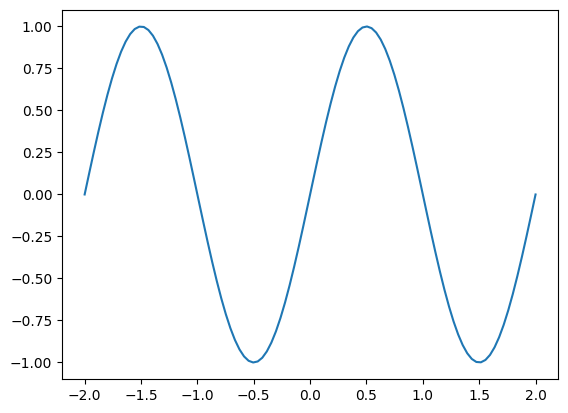

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14305f710>

In [62]:
plot(x, ux) # Let's plot!

In [63]:
sinxcosy = map_function_on_grid((x,y)->sin(x)*cos(y), 100, 200)

100×200 Array{Float64,2}:
 -0.454649  -0.461742  -0.468789  …  -0.468789  -0.461742  -0.454649
 -0.448659  -0.455659  -0.462612     -0.462612  -0.455659  -0.448659
 -0.442486  -0.449389  -0.456247     -0.456247  -0.449389  -0.442486
 -0.436132  -0.442937  -0.449696     -0.449696  -0.442937  -0.436132
 -0.429601  -0.436303  -0.442962     -0.442962  -0.436303  -0.429601
 -0.422894  -0.429492  -0.436046  …  -0.436046  -0.429492  -0.422894
 -0.416014  -0.422505  -0.428953     -0.428953  -0.422505  -0.416014
 -0.408965  -0.415346  -0.421684     -0.421684  -0.415346  -0.408965
 -0.401749  -0.408017  -0.414244     -0.414244  -0.408017  -0.401749
 -0.394369  -0.400522  -0.406634     -0.406634  -0.400522  -0.394369
 -0.386828  -0.392863  -0.398858  …  -0.398858  -0.392863  -0.386828
 -0.379129  -0.385044  -0.39092      -0.39092   -0.385044  -0.379129
 -0.371275  -0.377068  -0.382822     -0.382822  -0.377068  -0.371275
  ⋮                               ⋱                        
  0.379129   0.38

In [65]:
typeof(sinxcosy) # It's 2D array of Float64's

Array{Float64,2}

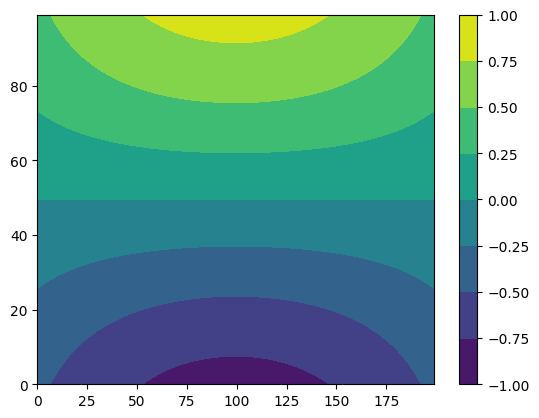

PyObject <matplotlib.colorbar.Colorbar object at 0x140862090>

In [69]:
contourf(sinxcosy) # Does it look right?
colorbar()

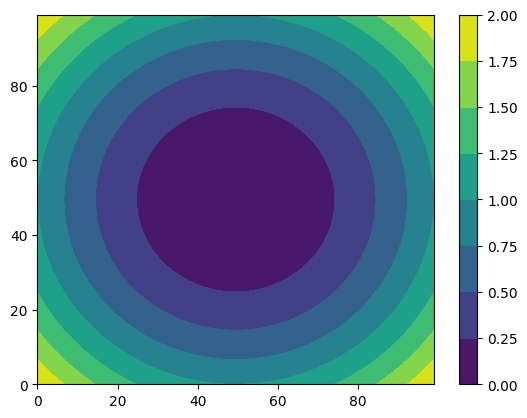

PyObject <matplotlib.colorbar.Colorbar object at 0x143c67cd0>

In [75]:
contourf(map_function_on_grid((x,y)->x^2+y^2, 100, 100)) # This does!
colorbar()